### VIDEO GAMES POPULARITY ANALYSIS

#### SUBMITTED BY 
#### PRIYANKA GANDHI
#### SAI SREE BHUMA 

### SUBMITTED TO DR. DIRIK REINERS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set(color_codes=True)
from pandas import read_csv
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.impute import SimpleImputer,MissingIndicator

In [2]:
url="https://raw.githubusercontent.com/Saisree45/finalproject/main/Video_Games_Sales_as_at_22_Dec_2016_new.csv"

In [3]:
data_file=pd.read_csv(url)

In [4]:
data_file

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0          Nintendo     41.36     28.96      3.77         8.45         82.53  
1          Nintendo     29.08      3.58      6.81         0.77         40.24  
2          Nintendo     15.68     12.76      3.79         3.29         35.52  
3          Nintendo     15.61     10.93      3.28         2.95         32.77  
4          Nintendo     11.27      8.89     10.22         1.00         31.37  
...             ...       ...       ...       ...          ...           ...  
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01  
16715   Codemasters      0.00      0.01      0.00         0.00          0.01  
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01  
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01  
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01  

[16719 rows x 10 columns]

In [5]:
#Data Cleaning
#checking if there is any null values in the data 
data_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


<AxesSubplot:xlabel='Platform', ylabel='Year_of_Release'>

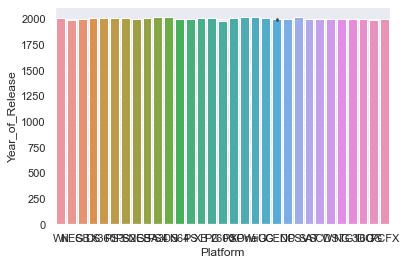

In [6]:
 sns.barplot(data_file['Platform'],data_file['Year_of_Release'])

<AxesSubplot:xlabel='Year_of_Release', ylabel='Density'>

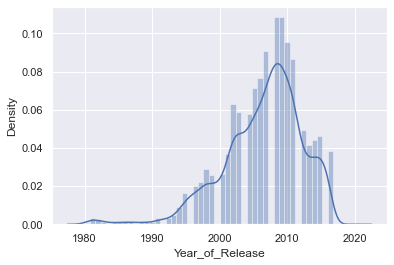

In [7]:
sns.distplot(data_file['Year_of_Release'])

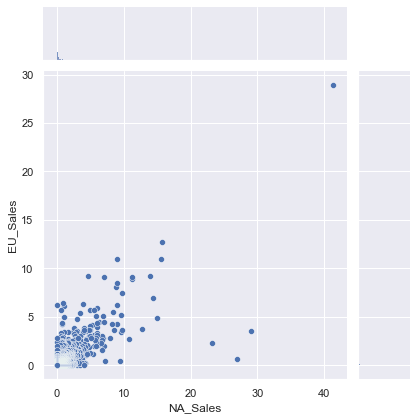

In [8]:
sns.jointplot(data_file['NA_Sales'],data_file['EU_Sales'])

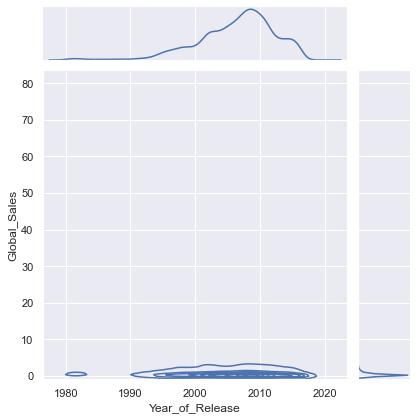

In [10]:
#bivariate relation visualization for year of release and Global Sales using kernal desity distribution as kind 
sns.jointplot(data_file['Year_of_Release'],data_file['Global_Sales'],kind='kde')

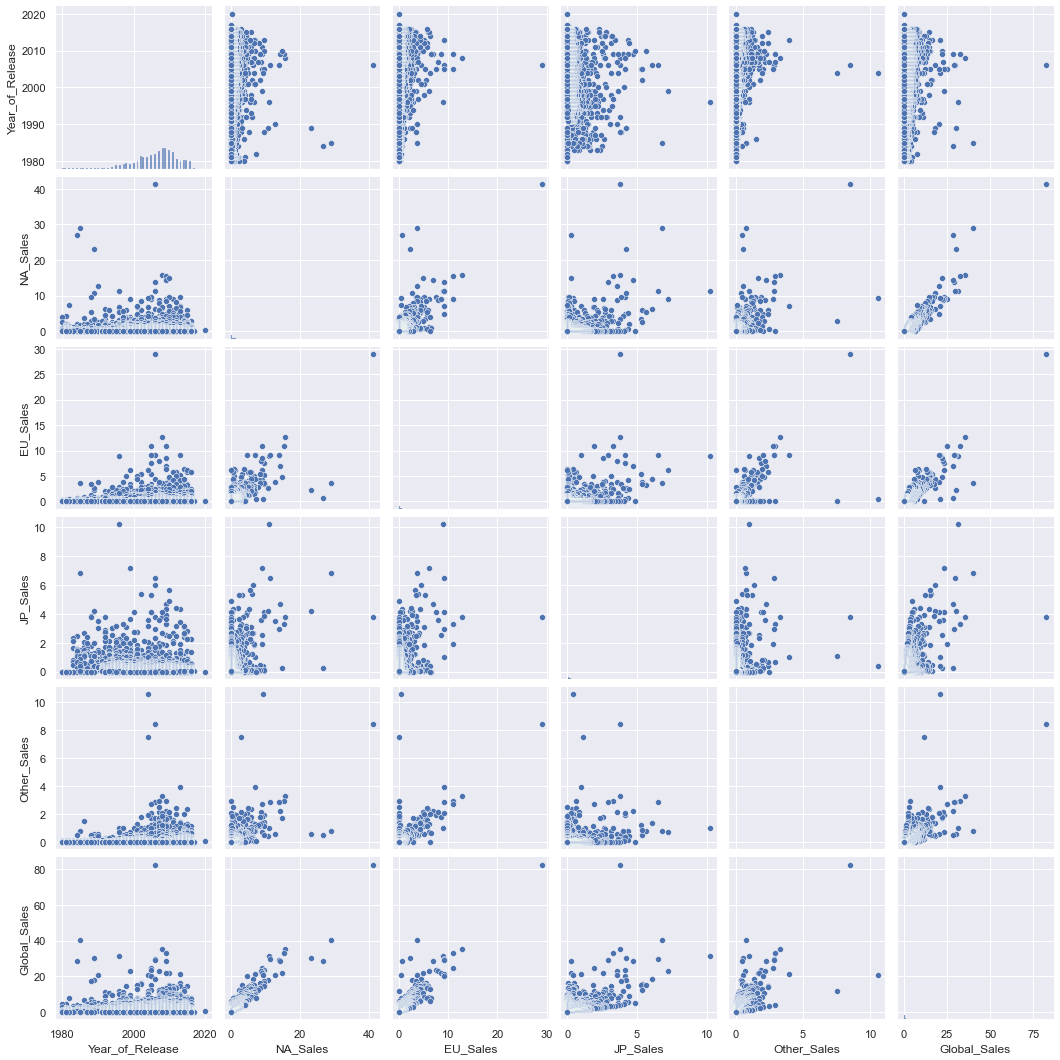

In [11]:
#Showing the Correlation
sns.pairplot(data_file)

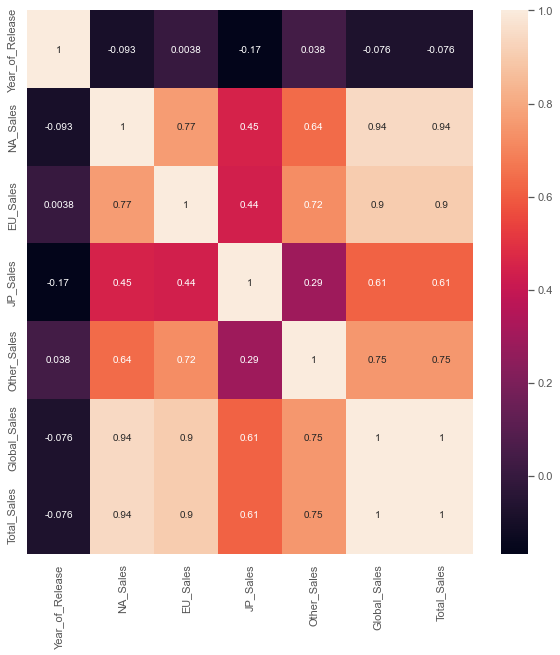

In [66]:
#HeatMaps visualization for our data_file
plt.figure(figsize=(10,10))
sns.heatmap(data_file.corr(), annot=True)
plt.show()

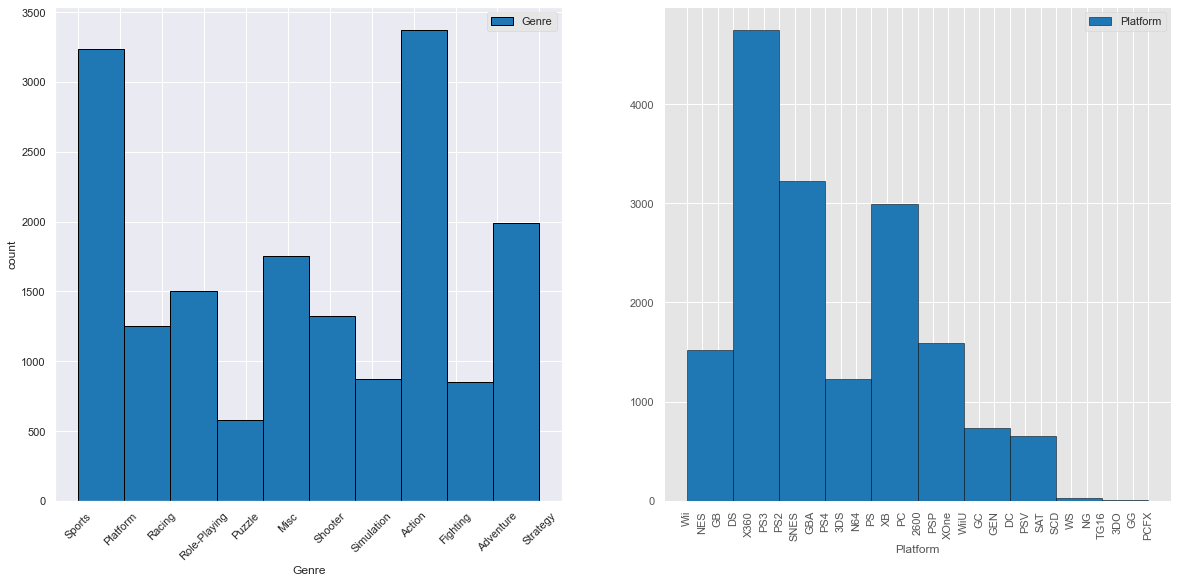

In [13]:
 plt.figure(figsize=[20,20])

plt.subplot(2,2,1)
data_file["Genre"].hist(edgecolor="black",color="#1F77B4",label="Genre")
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Genre")
plt.ylabel("count")
plt.legend()
plt.subplot(2,2,2)
data_file["Platform"].hist(edgecolor="black",color="#1F77B4",label="Platform")
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Platform")
plt.legend()
plt.show()

we notice that the sports and action games are the highest genre and the platform x360 and ps3 and ps2 the highest platform that the games shown on

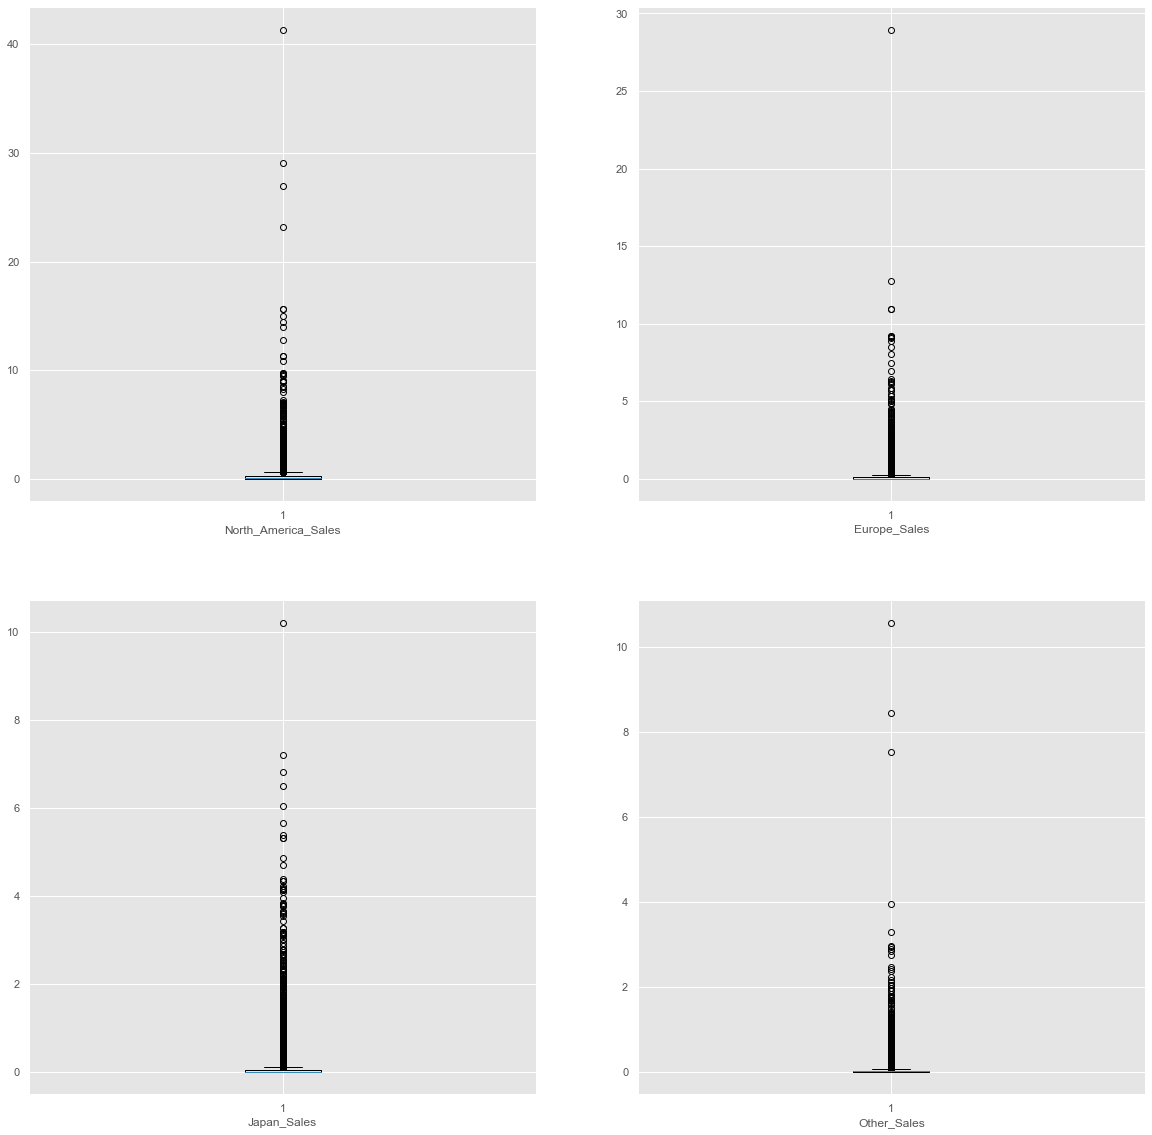

In [14]:
plt.figure(figsize=[20,20])

plt.subplot(2,2,1)
plt.boxplot(data_file["NA_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("North_America_Sales")
plt.subplot(2,2,2)
plt.boxplot(data_file["EU_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Europe_Sales")
plt.subplot(2,2,3)
plt.boxplot(data_file["JP_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Japan_Sales")
plt.subplot(2,2,4)
plt.boxplot(data_file["Other_Sales"])
plt.style.use('ggplot')
plt.grid(True)
plt.xlabel("Other_Sales")
plt.show()

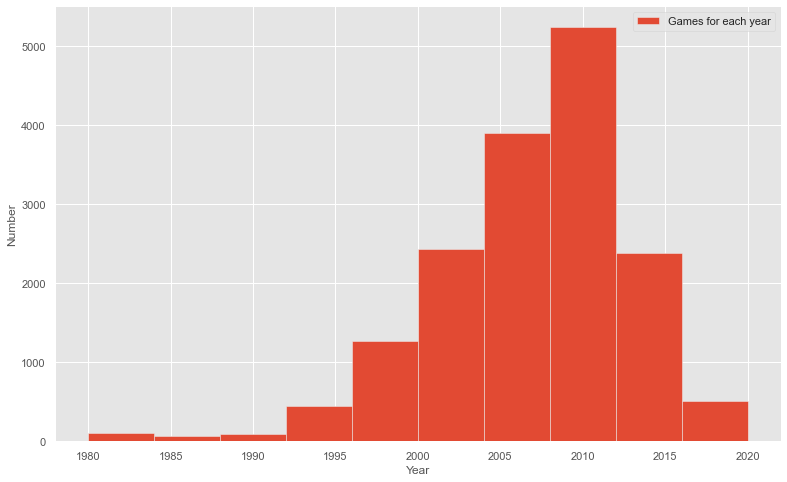

In [15]:
plt.figure(figsize=[13,8])
data_file["Year_of_Release"].hist(label="Games for each year")
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend()
plt.show()

We can see that most of the games are relseased between 2005 to 2015

<AxesSubplot:xlabel='count', ylabel='Genre'>

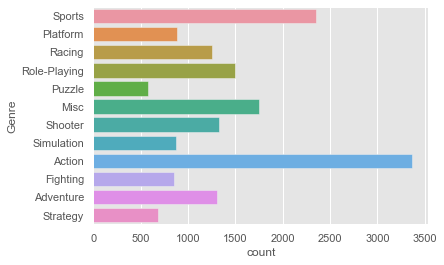

In [16]:
#Count Plot Graph
sns.countplot(y='Genre',data=data_file)

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

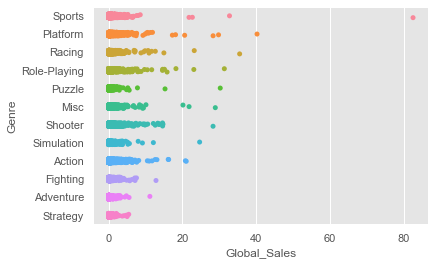

In [17]:
#Strippplot for categorical data
sns.stripplot(x='Global_Sales',y='Genre',data=data_file,jitter=True,dodge=True)

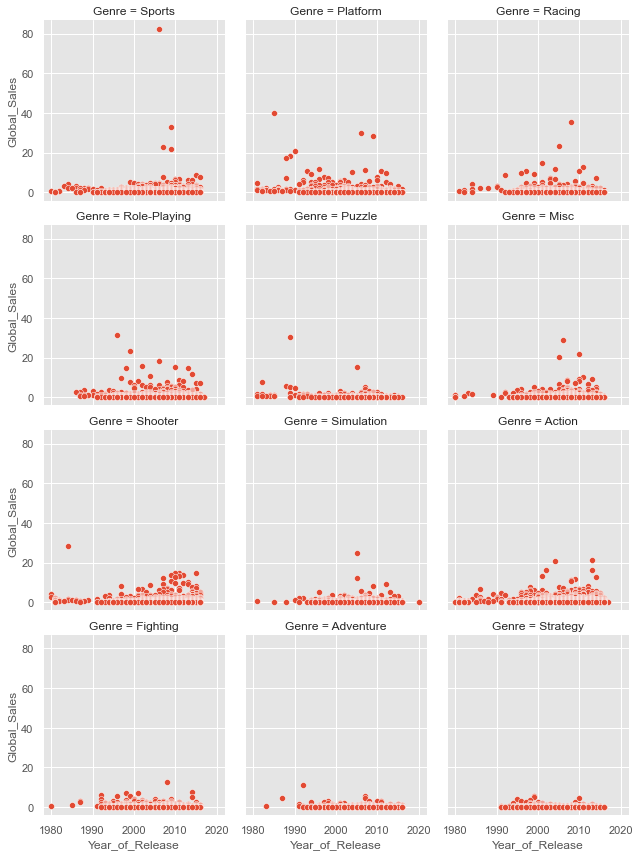

In [18]:
graph =sns.FacetGrid(data_file,col='Genre',aspect=1,col_wrap=3)
graph.map(sns.scatterplot,'Year_of_Release','Global_Sales')

FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.This is used to check all combinations of variables exist in our data.

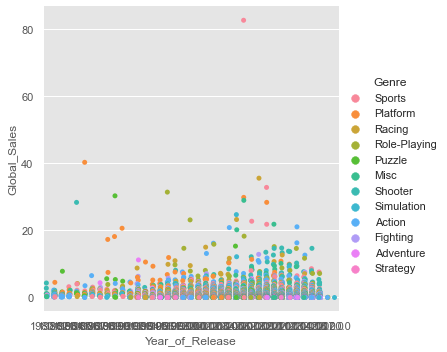

In [19]:
#Catplots are used to visualise the categorical data 

graph = sns.catplot(x="Year_of_Release", y="Global_Sales",
                hue="Genre",
                data=data_file)

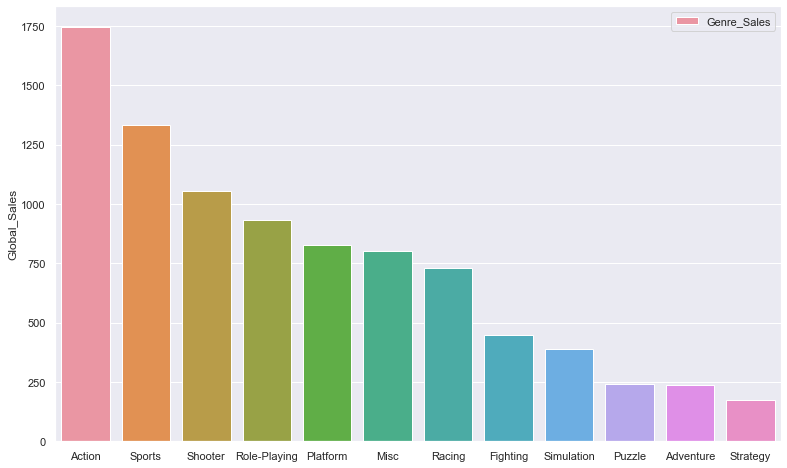

In [20]:
x=list(data_file.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = False).index)
y=data_file.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(13,8)})
sns.barplot(x,y,label="Genre_Sales")
plt.legend()
plt.show()

In [21]:
dftotal=data_file.groupby("Genre")["Global_Sales"].sum()
dftotal

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64

In [22]:
dftotal.nlargest()

Genre
Action          1745.27
Sports          1332.00
Shooter         1052.94
Role-Playing     934.40
Platform         828.08
Name: Global_Sales, dtype: float64

The action games and sports games are highest sales

WHICH PLATFORM GAMES ARE MOST SHOWN

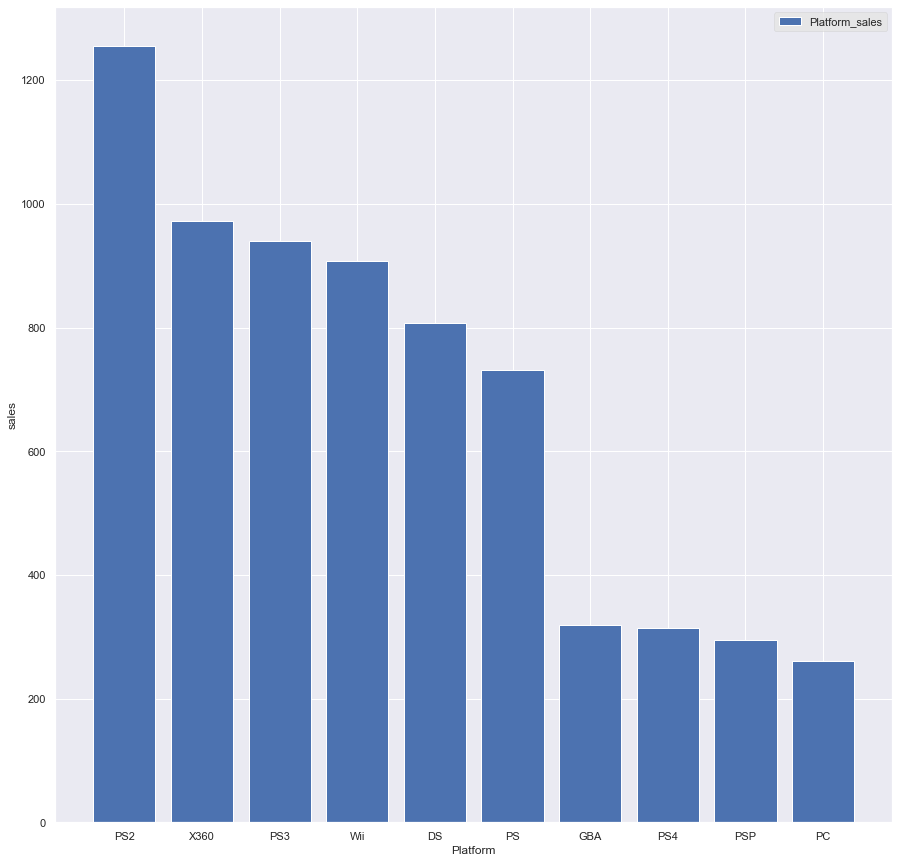

In [23]:
x=list(data_file.groupby("Platform")["Global_Sales"].sum().sort_values(ascending = False).iloc[:10].index)
y=data_file.groupby("Platform")["Global_Sales"].sum().sort_values(ascending= False).iloc[:10]
plt.figure(figsize=[15,15])
plt.bar(x,y,width=.8,label="Platform_sales",color="b")
plt.xlabel("Platform")
plt.ylabel("sales")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

PS2 Platform games have the highest sales

The highest year that has been achieved more sales?

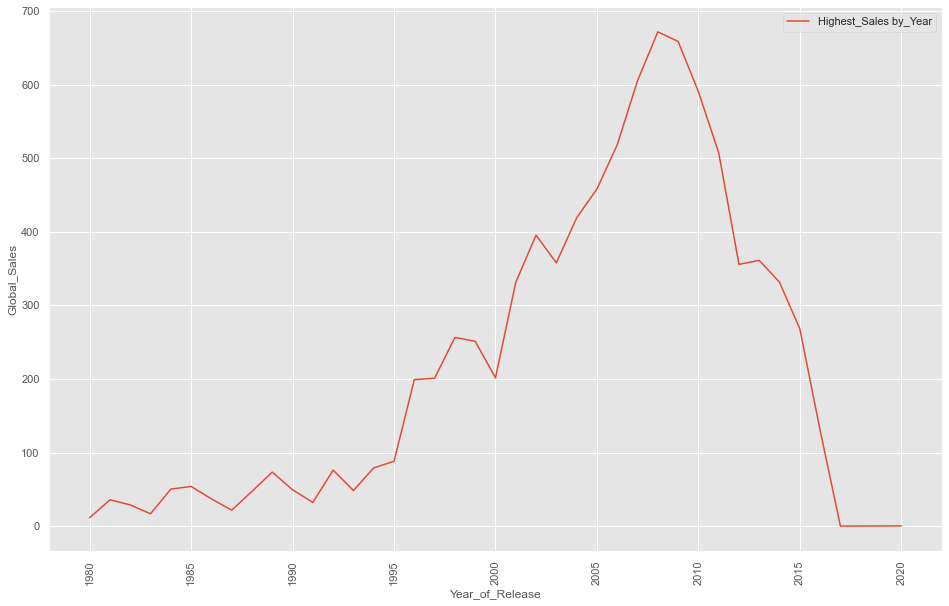

In [67]:
plt.figure(figsize=[16,10])
plt.plot(data_file.groupby("Year_of_Release")["Global_Sales"].sum(),label="Highest_Sales by_Year")
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.xlabel("Year_of_Release")
plt.ylabel("Global_Sales")
plt.grid(True)
plt.legend()
plt.show()

We notice that there are highest sales between 2009 and 2010 years

In [25]:
#Grouping year of release and number od games released in that year using yor and name parametres.

yor=data_file.groupby("Year_of_Release")["Name"].count()

In [26]:
yor

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Name, dtype: int64

In [27]:
yor.nlargest()

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: Name, dtype: int64

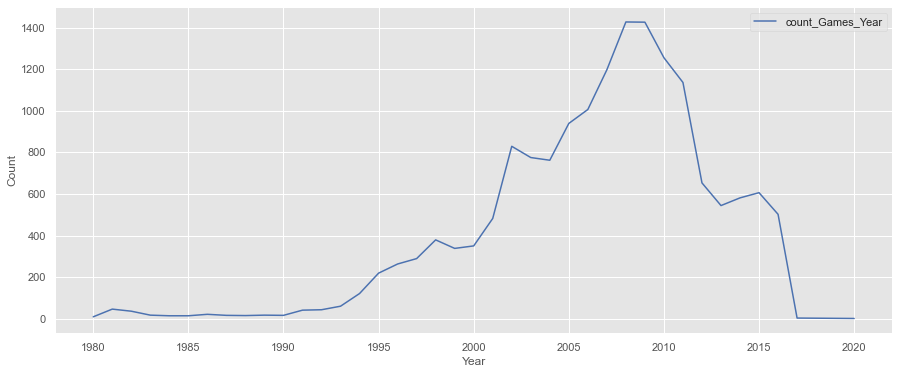

In [28]:
plt.figure(figsize=[15,6])
plt.plot(data_file.groupby("Year_of_Release")["Name"].count(),label="count_Games_Year",color="#4C72B0")
plt.xlabel("Year")
plt.ylabel("Count")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

2008-2010 has been released more games


which country has the highest sales?

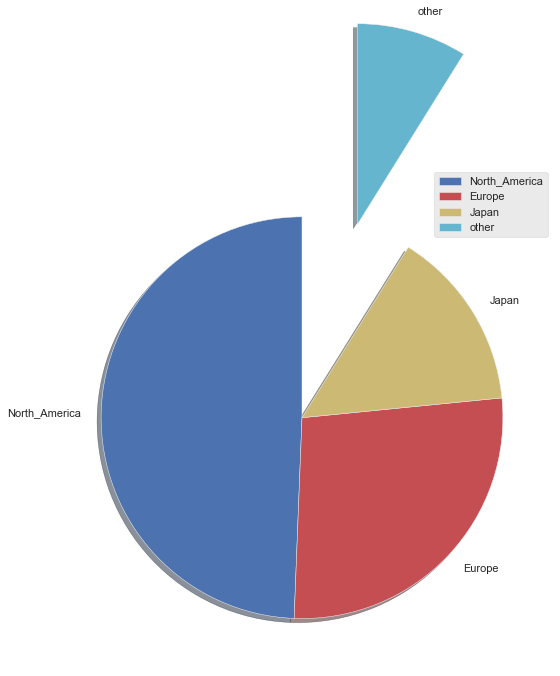

In [29]:
North_America=data_file["NA_Sales"].sum()
Europe=data_file["EU_Sales"].sum()
Japan=data_file["JP_Sales"].sum()
other=data_file["Other_Sales"].sum()
y=[North_America,Europe,Japan,other]
labels=["North_America","Europe","Japan","other"]
myexplode = [0, 0, 0, 1]
plt.figure(figsize=[9,10])
colors = ["b", "r","y", "c"]
plt.pie(y,labels=labels,colors=colors,shadow=True,startangle = 90,explode=myexplode)
plt.legend()
plt.style.use('ggplot')
plt.grid(True)
plt.show()

Seeing the above graph we can say that North America has the highest sales 

Which Publisher Acheived more sales?

Python List index() index() is an inbuilt function in Python, which searches for a given element from the start of the list and returns the lowest index where the element appears.

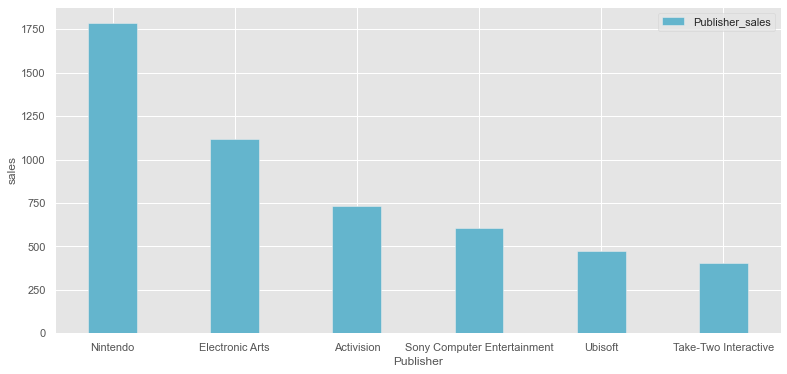

In [30]:
x=list(data_file.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending = False).iloc[:6].index)
y=data_file.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending= False).iloc[:6]
plt.figure(figsize=[13,6])
plt.bar(x,y,width=.4,label="Publisher_sales",color="c")
plt.xlabel("Publisher")
plt.ylabel("sales")
plt.style.use('ggplot')
plt.grid(True)
plt.legend()
plt.show()

### TOP 8 PLATFORMS

In [31]:
platforms = data_file['Platform'].value_counts()

In [32]:
platforms = platforms.head(8)
platforms

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
Name: Platform, dtype: int64

Global Sales of Top 8 Platforms 

In [33]:
sum_platform = data_file.groupby('Platform').sum().sort_values(by='Global_Sales',ascending=False)['Global_Sales'].head(8)
sum_platform

Platform
PS2     1255.64
X360     971.63
PS3      939.43
Wii      908.13
DS       807.10
PS       730.68
GBA      318.50
PS4      314.23
Name: Global_Sales, dtype: float64

Illustrating Bar charts and Pie charts of Top 8 Platforms and Global Sales percentage of Top 8 Platforms

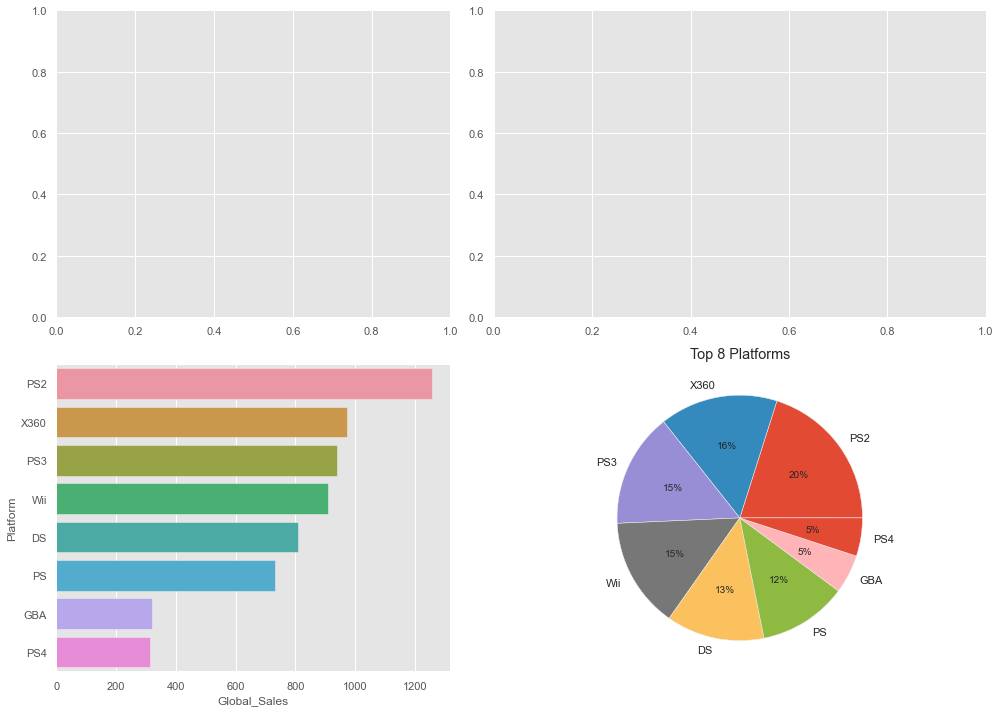

In [64]:
fig, ax = plt.subplots(2,2,figsize=(14,10), gridspec_kw=dict(width_ratios=[4,5]))




sns.barplot(y=sum_platform.index, x=sum_platform,ax=ax[1,0])
plt.title("Top 8 Platforms")
ax[1,1].pie(sum_platform, labels=sum_platform.index, autopct="%.0f%%")
plt.title("Top 8 Platforms")




fig.tight_layout()

### Top Genere and Global Sales Percentage of Top Genere 

In [35]:
genere =  data_file['Genre'].value_counts()
genere

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Highest Genere in Global Sales 

In [36]:
genere_sales = data_file.groupby('Genre')['Global_Sales'].sum()
genere_sales

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64

Plotting Bar Graphs to viusalize both of the analysis 

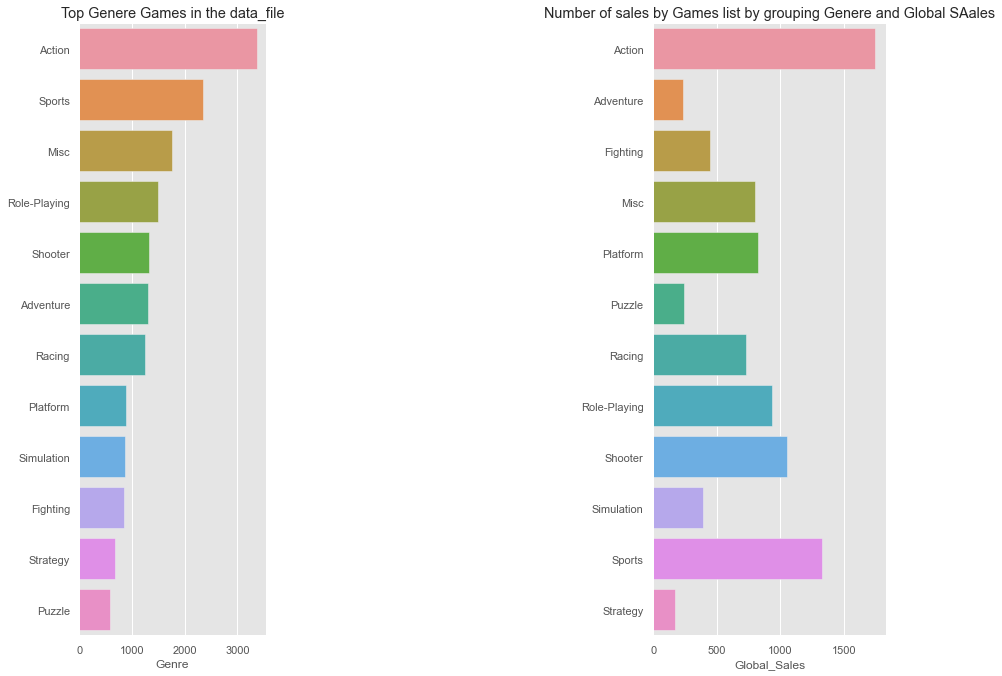

In [37]:
fig, ax = plt.subplots(1,2,figsize=(14,10), gridspec_kw=dict(width_ratios=[4,5]))

sns.barplot(y=genere.index, x=genere, ax=ax[0])
ax[0].set_title("Top Genere Games in the data_file")
plt.xlabel('Amount of Games by type')

sns.barplot(y=genere_sales.index, x=genere_sales,ax=ax[1])
ax[1].set_title("Number of sales by Games list by grouping Genere and Global SAales")
plt.ylabel('')
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.9, wspace=1.85, hspace=0.35)
plt.show()

#### DIFFERENT TRENDS OF SALES OVER REGIONS

In [38]:
year = data_file.groupby(["Year_of_Release"])["NA_Sales", "JP_Sales", 'EU_Sales','Other_Sales'].sum()

In [39]:
year

NA_Sales  JP_Sales  EU_Sales  Other_Sales
Year_of_Release                                           
1980.0              10.59      0.00      0.67         0.12
1981.0              33.40      0.00      1.96         0.32
1982.0              26.92      0.00      1.65         0.31
1983.0               7.76      8.10      0.80         0.14
1984.0              33.28     14.27      2.10         0.70
1985.0              33.73     14.56      4.74         0.92
1986.0              12.50     19.81      2.84         1.93
1987.0               8.46     11.63      1.41         0.20
1988.0              23.87     15.76      6.59         0.99
1989.0              45.15     18.36      8.44         1.50
1990.0              25.46     14.88      7.63         1.40
1991.0              12.76     14.78      3.95         0.74
1992.0              33.89     28.91     11.71         1.65
1993.0              16.90     25.36      5.18         0.97
1994.0              28.16     33.99     14.88         2.20
1995.0              24.83     45.75     14.90         2.64
1996.0              86.76     57.44     47.26         7.69
1997.0              94.75     48.87     48.32         9.13
1998.0             128.36     50.04     66.90        11.01
1999.0             126.06     52.34     62.67        10.04
2000.0              94.50     42.77     52.77        11.62
2001.0             173.98     39.86     94.89        22.73
2002.0             216.19     41.76    109.75        27.27
2003.0             193.61     34.20    103.81        25.92
2004.0             222.51     41.65    107.28        47.24
2005.0             242.15     54.27    121.11        40.29
2006.0             262.13     73.74    127.89        53.95
2007.0             309.89     60.29    157.82        76.75
2008.0             348.69     60.25    181.14        81.42
2009.0             335.55     61.89    187.94        73.44
2010.0             300.65     59.49    171.42        58.57
2011.0             238.79     53.07    162.97        52.75
2012.0             153.26     51.80    114.59        36.19
2013.0             153.65     47.69    121.55        38.35
2014.0             132.27     39.69    122.74        36.83
2015.0             106.86     34.09     96.72        30.31
2016.0              44.93     19.31     51.22        14.48
2017.0               0.00      0.06      0.00         0.00
2020.0               0.27      0.00      0.00         0.02

Plotting it shows us the trend over regions 

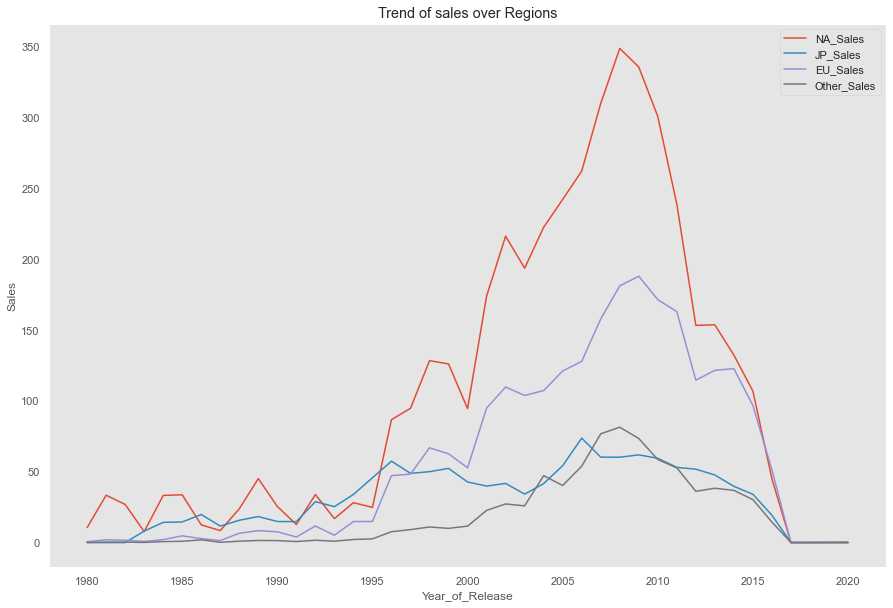

In [40]:
year.plot(figsize=(15,10))
plt.title('Trend of sales over Regions')
plt.ylabel("Sales")
plt.grid()
plt.show()

###  Counting Games Over Years with Median

In [41]:
plt.figure(figsize=(16,12))
fig = px.histogram(data_file,
                  x='Year_of_Release',
                  marginal = 'box',
                  title='Games count'
                  )
fig.update_layout(bargap=0.1)
fig.show()
plt.show()

<Figure size 1152x864 with 0 Axes>

Released games by Year

In [42]:
total_sales_column = "Total_Sales"


if 'Total_Shipped' in data_file.columns:
    data_file[total_sales_column] = data_file['Total_Shipped'].fillna(0) + data_file['Global_Sales'].fillna(0)
else:
    regions = ['NA', 'JP', 'EU', 'Other']
    region_sales_sufix = '_Sales'
    
    data_file[total_sales_column] = data_file['Global_Sales']

In [43]:
tdf = data_file.copy()
# tdf['Year'] = df['Year'].fillna(df['Year'].mean())
tdf = data_file[data_file['Year_of_Release'].notna()] # Carefull about this
tdf = tdf.sort_values('Year_of_Release', ascending=True)

Used package plotly to visulaize different figures

In [44]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

fig = px.histogram(
    tdf,
    x='Platform',
    animation_frame='Year_of_Release',
    range_y=[0, 550],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

Bar Graph with Plotly package total released video games by platform and in which year max games released

In [45]:
top_tdf = tdf.groupby(['Platform', 'Year_of_Release']).agg({total_sales_column: 'count'}).reset_index()
top_tdf.columns = ['Platform', 'Year_of_Release', 'Count']
top_tdf = top_tdf[top_tdf['Year_of_Release'].isin([2016, 2017, 2018, 2019])]
top_tdf = top_tdf[top_tdf['Count'] > top_tdf['Count'].sum() * 0.01]
top_tdf['Year_of_Release'] = top_tdf['Year_of_Release'].astype(str)

In [46]:
fig = px.bar(
    top_tdf,
    x='Platform',
    y='Count',
    color='Year_of_Release',
    barmode="group"
    
)
fig.update_layout(title="Total released video-games by platform")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

platform_tops = ['PS4', 'PSV', 'XOne', 'PC']

Sales Analysis

In [47]:
platform_tdf = tdf.groupby(['Platform', 'Year_of_Release']).agg({total_sales_column: 'sum'}).reset_index()
platform_tdf = platform_tdf.sort_values('Year_of_Release', ascending=True)
platform_tdf.head()

Platform  Year_of_Release  Total_Sales
0      2600           1980.0        11.38
1      2600           1981.0        35.77
2      2600           1982.0        28.86
3      2600           1983.0         5.83
78      NES           1983.0        10.96

In [48]:
fig = px.bar(
    platform_tdf,
    x='Platform',
    y=total_sales_column,
    animation_frame='Year_of_Release',
    range_y=[0, 150],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

Total sales by platforms in millions¶

In [49]:

platform_top_tdf = platform_tdf[platform_tdf['Year_of_Release'].isin([2016, 2017, 2018, 2019])]
platform_top_tdf = platform_top_tdf[platform_top_tdf[total_sales_column] > platform_top_tdf[total_sales_column].sum() * 0.005]
platform_top_tdf['Year_of_Release'] = platform_top_tdf['Year_of_Release'].astype(str)

fig = px.bar(
    platform_top_tdf,
    x='Platform',
    y=total_sales_column,
    color='Year_of_Release',
    barmode="group"
)
fig.update_layout(title="Total sales by platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()


Years sales distribution by year

In [50]:
year_geo_df = tdf[["Year_of_Release",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

year_geo_df[['NA_mean','EU_mean','JP_mean','Other_mean']] = year_geo_df.groupby('Year_of_Release')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
year_geo_df = year_geo_df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
year_geo_df = year_geo_df.drop_duplicates()
year_geo_df = year_geo_df.sort_values("Year_of_Release")

temp_df1 = pd.DataFrame({'Place': ['NA_Sales']*year_geo_df.shape[0], 'Year_of_Release':year_geo_df['Year_of_Release'], 'Sales': year_geo_df['NA_mean']})
temp_df2 = pd.DataFrame({'Place': ['EU_Sales']*year_geo_df.shape[0], 'Year_of_Release': year_geo_df['Year_of_Release'], 'Sales': year_geo_df['EU_mean']})
temp_df3 = pd.DataFrame({'Place': ['JP_Sales']*year_geo_df.shape[0], 'Year_of_Release': year_geo_df['Year_of_Release'], 'Sales': year_geo_df['JP_mean']})
temp_df4 = pd.DataFrame({'Place': ['Other_Sales']*year_geo_df.shape[0], 'Year_of_Release': year_geo_df['Year_of_Release'], 'Sales': year_geo_df['Other_mean']})


final = pd.concat([temp_df1,temp_df2,temp_df3,temp_df4], axis=0)
final = final.sort_values("Year_of_Release")

fig=px.bar(
    final,
    x='Place', 
    y="Sales", 
    animation_frame="Year_of_Release",
    animation_group="Place", 
    color="Place", 
    hover_name="Place",
    range_y=[0, 200]
)
fig.update_layout(title="Year sales distribution by region",title_x=0.5)

fig.show()

Sales Distribution 

In [51]:
if 'Total_Shipped' in data_file.columns:
    regions = ['NA', 'JP', 'PAL', 'Other']
else:
    regions = ['NA', 'JP', 'EU', 'Other']

region_sales_sufix = '_Sales'
regions_agg = {}

for region in regions:
    regions_agg[region + region_sales_sufix] = 'sum'

regions_agg[total_sales_column] = 'sum'
regions_agg

{'NA_Sales': 'sum',
 'JP_Sales': 'sum',
 'EU_Sales': 'sum',
 'Other_Sales': 'sum',
 'Total_Sales': 'sum'}

In [52]:
geo_tdf = tdf.groupby(['Year_of_Release']).agg(regions_agg).reset_index()
geo_tdf = geo_tdf.sort_values('Year_of_Release', ascending=True)
geo_tdf.head(10)

Year_of_Release  NA_Sales  JP_Sales  EU_Sales  Other_Sales  Total_Sales
0           1980.0     10.59      0.00      0.67         0.12        11.38
1           1981.0     33.40      0.00      1.96         0.32        35.77
2           1982.0     26.92      0.00      1.65         0.31        28.86
3           1983.0      7.76      8.10      0.80         0.14        16.79
4           1984.0     33.28     14.27      2.10         0.70        50.36
5           1985.0     33.73     14.56      4.74         0.92        53.94
6           1986.0     12.50     19.81      2.84         1.93        37.07
7           1987.0      8.46     11.63      1.41         0.20        21.74
8           1988.0     23.87     15.76      6.59         0.99        47.22
9           1989.0     45.15     18.36      8.44         1.50        73.45

In [53]:
fig = go.Figure()

for region in regions:
    
    fig.add_trace(go.Scatter(
        x=geo_tdf['Year_of_Release'], 
        y=geo_tdf[region + region_sales_sufix], 
        mode='lines',
        name=region,
    ))
fig.update_layout(title="Total sales per year by region (Millions)")
fig.update_xaxes(type='category')
fig.show()

Sales Distrinution of Genre and Region(Million) last five years

In [55]:
genre_last_tdf = tdf[tdf['Year_of_Release'].isin([2016, 2017, 2018, 2019,2020])]
genre_last_tdf = genre_last_tdf.groupby(['Genre']).agg(regions_agg)
genre_last_tdf = genre_last_tdf.sort_values(total_sales_column, ascending=False)
genre_last_tdf.head()

NA_Sales  JP_Sales  EU_Sales  Other_Sales  Total_Sales
Genre                                                               
Shooter          16.24      1.06     15.90         5.02        38.23
Action            9.29      7.08     10.68         3.07        30.24
Sports            7.54      0.92     12.01         3.02        23.53
Role-Playing      5.89      6.66      4.28         1.40        18.17
Fighting          1.84      0.75      1.34         0.54         4.44

In [56]:
fig = px.imshow(genre_last_tdf.drop(total_sales_column, 1).T)
fig.update_layout(title="Sales distribution by genre and region (Millions) last four years")
fig.show()